In [1]:
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.insert(0, "/gpfswork/rech/omr/uen17sn/NewSpinUp/lib")
from simu_path import path1
import prepare

#import importlib
#importlib.reload(prepare)

## **Load Data**

### 1.1 - Select parameters

In [73]:
simu_nb  = 104
yearly   = False
main     = "NONE"
features = [""]
df       = prepare.createDataset(simu   = simu_nb,
                                 yearly = yearly,
                                 main   = main)
print(df.shape)

(6540, 69)


In [74]:
path = f'/gpfswork/rech/omr/uen17sn/NewSpinUp/datasets/monthly/dataFrame/simu{simu_nb}'
df.to_csv(path) 

___

## Visualise Data (MONTHLY)

In [75]:
n       = 3  #show 3 comp
s       = 12 #season
nb_seas = df.shape[0]//s
var     = "zos"

if (s==3):
    seas_df = df.rolling(window=s, min_periods=1).mean()
    print(seas_df.shape)

### 2.1 - Time series decomposition

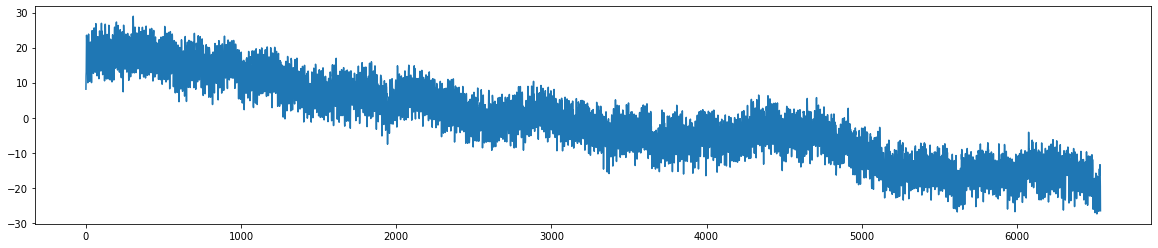

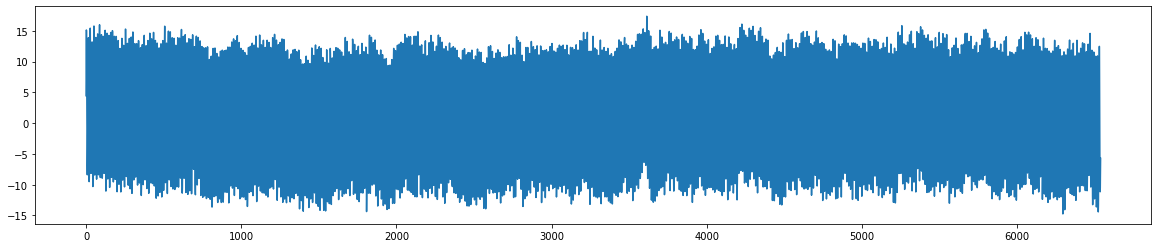

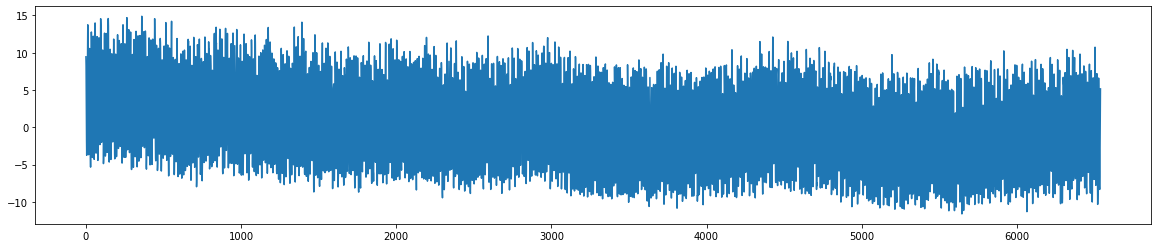

In [76]:
for i in range(n):
    fig = plt.figure(figsize=(20,4))
    plt.plot(df[f"{var}-{i+1}"])
    plt.show()

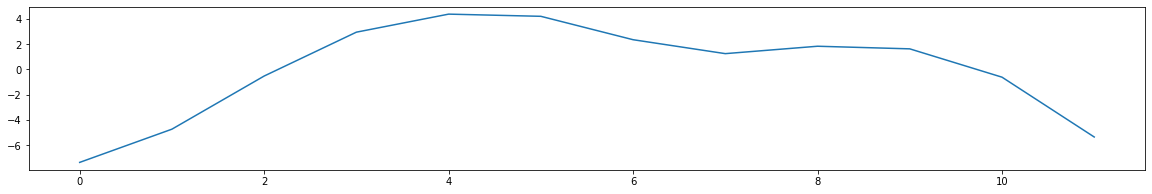

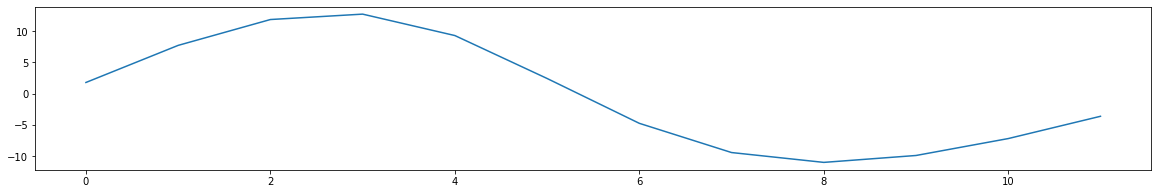

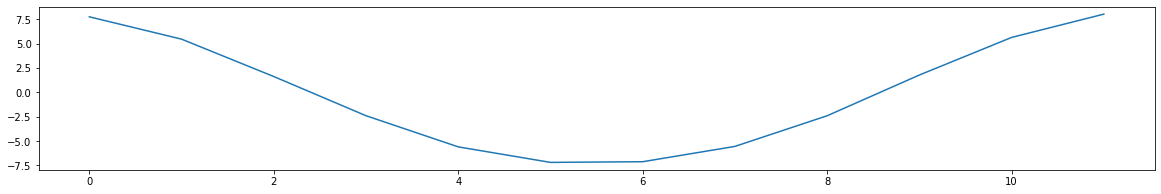

In [77]:
seasonality = df.groupby(df.index % s).mean()

for i in range(n):
    fig = plt.figure(figsize=(20,3))
    plt.plot(seasonality[f"{var}-{i+1}"])
    plt.show()

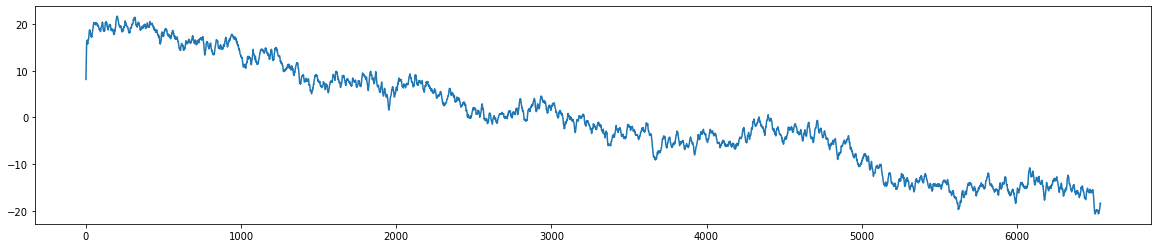

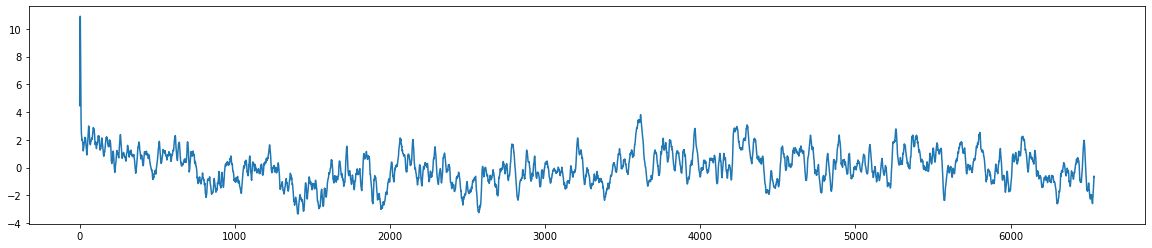

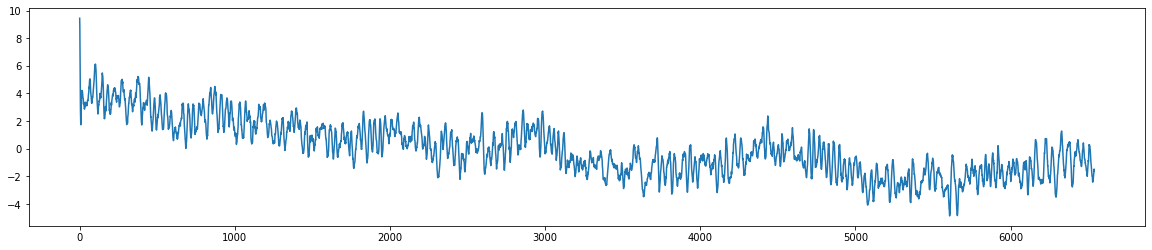

In [78]:
trend = df.rolling(window=12, min_periods=1).mean()

for i in range(n):
    fig = plt.figure(figsize=(20,4))
    plt.plot(trend[f"{var}-{i+1}"])
    plt.show()

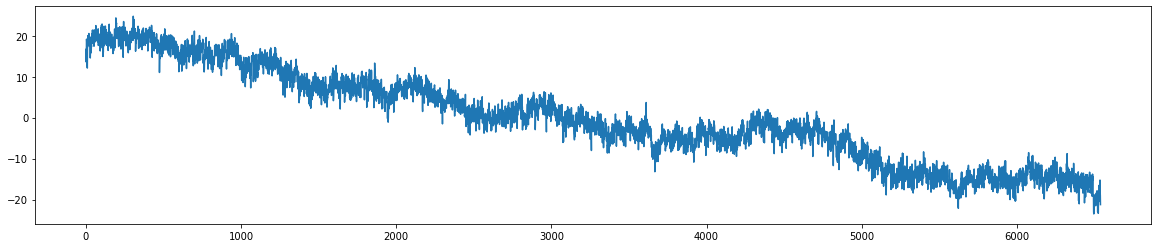

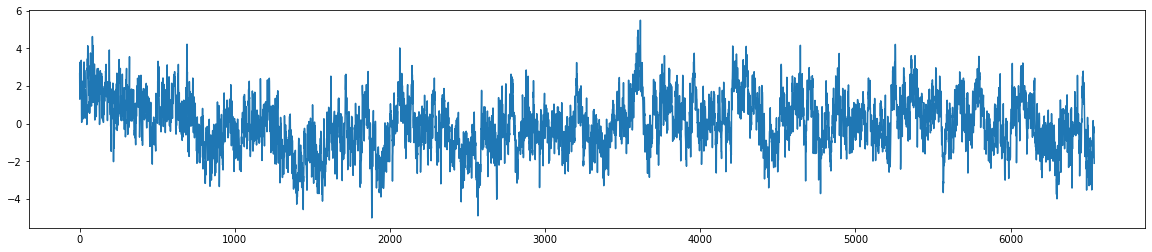

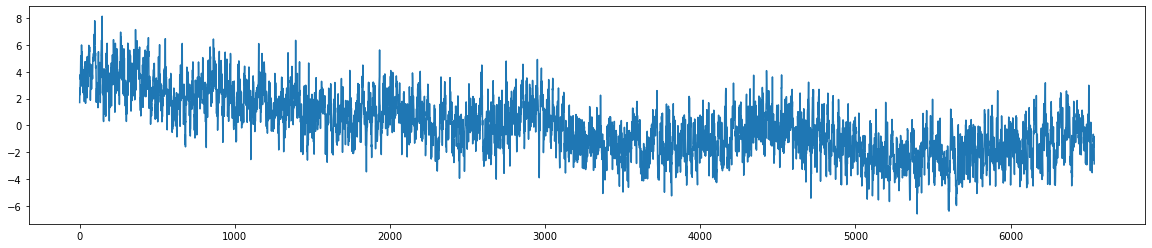

In [79]:
expanded_seas = pd.concat([seasonality] * nb_seas, ignore_index=True)
residuals = df-expanded_seas #-trend

for i in range(n):
    fig = plt.figure(figsize=(20,4))
    plt.plot(residuals[f"{var}-{i+1}"])
    plt.show()

## **Extract EOFs**

Correlation matrix is normal

<AxesSubplot:>

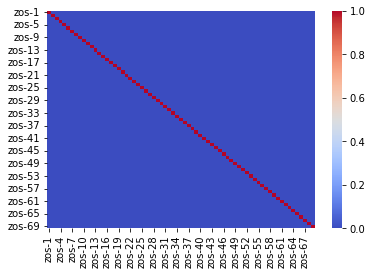

In [80]:
import seaborn as sns
sns.heatmap(data=df.corr(method="pearson"),cmap='coolwarm')

<AxesSubplot:>

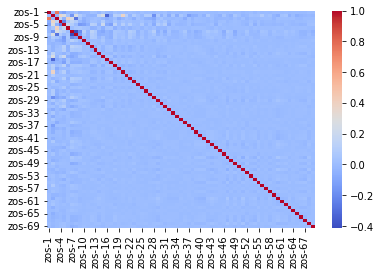

In [81]:
sns.heatmap(data=(df-expanded_seas).corr(method="pearson"),cmap='coolwarm')

<AxesSubplot:>

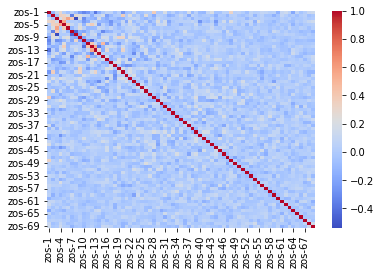

In [82]:
sns.heatmap(data=(df-expanded_seas-trend).corr(method="pearson"),cmap='coolwarm')

## **Save dataset**

___